# RESULTS CPI FORECASTING

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### Read File 

In [3]:
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )
data.head()


,All-items,Food,Shelter,Household operations,Clothing and footwear,Transportation,Gasoline,Health and personal care,Recreation & education,"Alcohol, tobacco & cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
Date,,,,,,,,,,,,,,,
2003-01-01,102.0,101.6,102.1,100.1,96.6,105.5,108.4,100.5,99.3,106.8,101.5,101.5,108.3,101.9,102.1
2003-02-01,102.8,101.5,102.5,100.6,98.7,107.1,116.1,100.8,100.6,108.1,102.1,102.0,113.0,103.0,102.6
2003-03-01,103.1,101.7,103.2,100.6,100.3,107.6,117.2,100.5,100.3,108.3,102.3,102.2,115.3,103.6,102.7
2003-04-01,102.4,101.8,102.3,100.7,98.7,105.4,106.7,101.2,100.0,108.9,102.3,102.2,106.0,101.9,102.9
2003-05-01,102.5,102.1,102.9,100.6,98.3,104.0,99.3,101.4,100.7,110.2,102.5,102.4,103.7,101.8,103.2


#### Get Basic summary stastistics and information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2003-01-01 to 2023-04-01
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All-items                             244 non-null    float64
 1   Food                                  244 non-null    float64
 2   Shelter                               244 non-null    float64
 3   Household operations                  244 non-null    float64
 4   Clothing and footwear                 244 non-null    float64
 5   Transportation                        244 non-null    float64
 6   Gasoline                              244 non-null    float64
 7   Health and personal care              244 non-null    float64
 8   Recreation & education                244 non-null    float64
 9   Alcohol, tobacco & cannabis           244 non-null    float64
 10  All-items excluding food and energy   244 non-null    float64
 11  

In [5]:
data.columns

Index(['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services '],
      dtype='object')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All-items,244.0,123.229508,13.362860,102.0,112.175,122.70,133.000,156.4
Food,244.0,132.002459,20.085299,100.7,112.600,131.80,144.700,183.1
Shelter,244.0,129.881148,16.165007,102.1,119.500,127.95,140.075,169.9
Household operations,244.0,114.036885,9.665732,100.1,104.000,114.05,122.725,133.7
Clothing and footwear,244.0,94.535246,2.662912,87.9,92.775,94.65,96.225,100.8
Transportation,244.0,128.072541,15.869033,103.7,116.700,127.35,137.125,176.2
Gasoline,244.0,161.768852,33.503064,99.3,142.525,157.40,183.350,299.4
Health and personal care,244.0,117.973361,10.583401,100.5,107.900,118.40,125.600,145.7
Recreation & education,244.0,108.413115,7.160660,99.1,102.075,106.40,114.500,127.1
"Alcohol, tobacco & cannabis",244.0,144.764754,21.909026,106.8,126.600,139.60,166.475,189.4


In [7]:
#checking for missing values
data.isnull().sum()

All-items                               0
Food                                    0
Shelter                                 0
Household operations                    0
Clothing and footwear                   0
Transportation                          0
Gasoline                                0
Health and personal care                0
Recreation & education                  0
Alcohol, tobacco & cannabis             0
All-items excluding food and energy     0
All-items excluding energy              0
Energy                                  0
Goods                                   0
Services                                0
dtype: int64

In [8]:
data= data[['All-items']]
data.head()

,All-items
Date,
2003-01-01,102.0
2003-02-01,102.8
2003-03-01,103.1
2003-04-01,102.4
2003-05-01,102.5


# PROPOSED MODEL 

### RNN Encoder Decoder Single Head Attention Model

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, Embedding, Flatten, Activation, Concatenate, Dot
from tensorflow.keras.models import Model

# Assuming "data" is your DataFrame with all the columns

# Prepare data for only "All-items" column
all_items_data = data[['All-items']]

# Define the train-test split
train_data = all_items_data[:-4]
test_data = all_items_data[-7:]

# Define the model architecture
# Define the model architecture

encoder_inputs = Input(shape=(None, 1))
encoder_lstm = LSTM(180, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(180, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Attention mechanism
attention = Dot(axes=[2, 2])([decoder_outputs, encoder_outputs])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([context, decoder_outputs])

output = TimeDistributed(Dense(1, activation='linear'))(decoder_combined_context)

model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='mse')

# Train the model with teacher forcing
encoder_input_train = train_data.values[:-1, :, np.newaxis]
decoder_input_train = train_data.values[1:, :, np.newaxis]
decoder_output_train = train_data.values[1:, :, np.newaxis]

model.fit(
    [encoder_input_train, decoder_input_train],
    decoder_output_train,
    epochs=500,
    batch_size=4
)

# Evaluate the model on the test set
encoder_input_test = test_data.values[:-1, :, np.newaxis]
decoder_input_test = test_data.values[1:, :, np.newaxis]
decoder_output_test = test_data.values[1:, :, np.newaxis]

preds = model.predict([encoder_input_test, decoder_input_test])
predictions = preds.squeeze()
test_values = decoder_output_test.squeeze()

mae = mean_absolute_error(test_values, predictions)
smape = 100 * np.mean(2 * np.abs(predictions - test_values) / (np.abs(predictions) + np.abs(test_values)))
rmse = np.sqrt(mean_squared_error(test_values, predictions))
r2 = r2_score(test_values, predictions)




Epoch 1/500
60/60 [==============================] - 2s 3ms/step - loss: 12972.4678
Epoch 2/500
60/60 [==============================] - 0s 3ms/step - loss: 8186.6191
Epoch 3/500
60/60 [==============================] - 0s 3ms/step - loss: 4963.6348
Epoch 4/500
60/60 [==============================] - 0s 3ms/step - loss: 3008.6082
Epoch 5/500
60/60 [==============================] - 0s 3ms/step - loss: 1790.0447
Epoch 6/500
60/60 [==============================] - 0s 3ms/step - loss: 1063.2539
Epoch 7/500
60/60 [==============================] - 0s 3ms/step - loss: 630.5050
Epoch 8/500
60/60 [==============================] - 0s 3ms/step - loss: 395.7452
Epoch 9/500
60/60 [==============================] - 0s 3ms/step - loss: 274.0505
Epoch 10/500
60/60 [==============================] - 0s 3ms/step - loss: 212.1570
Epoch 11/500
60/60 [==============================] - 0s 3ms/step - loss: 183.5320
Epoch 12/500
60/60 [==============================] - 0s 3ms/step - loss: 169.3964
Epoch 

60/60 [==============================] - 0s 3ms/step - loss: 0.1176
Epoch 102/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 103/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0854
Epoch 104/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 105/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 106/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1624
Epoch 107/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 108/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1162
Epoch 109/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 110/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 111/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1292
Epoch 112/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1421
Epoch 113/500
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 202/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 203/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 204/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 205/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 206/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 207/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 208/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 209/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1834
Epoch 210/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1848
Epoch 211/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 212/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1048
Epoch 213/500
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 302/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 303/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 304/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1570
Epoch 305/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6419
Epoch 306/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1944
Epoch 307/500
60/60 [==============================] - 0s 3ms/step - loss: 0.3669
Epoch 308/500
60/60 [==============================] - 0s 3ms/step - loss: 0.3202
Epoch 309/500
60/60 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 310/500
60/60 [==============================] - 0s 3ms/step - loss: 0.2974
Epoch 311/500
60/60 [==============================] - 0s 3ms/step - loss: 0.1003
Epoch 312/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 313/500
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.0932
Epoch 402/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 403/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 404/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0859
Epoch 405/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 406/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0641
Epoch 407/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 408/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 409/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 410/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 411/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 412/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 413/500
60/60 [=========

#### Actual vs Predicted Outputs 

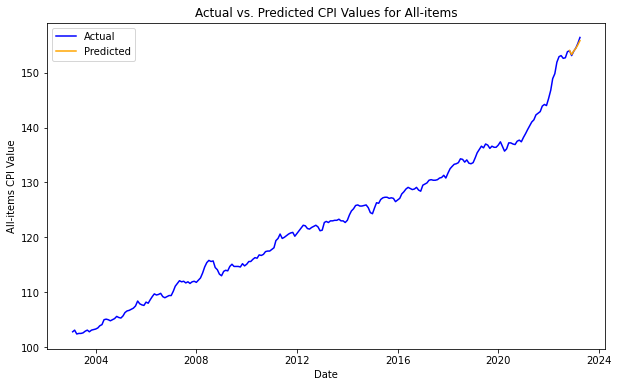

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(all_items_data.index[1:], all_items_data.values[1:], label='Actual', color='blue')
plt.plot(test_data.index[1:], predictions, label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('Actual vs. Predicted CPI Values for All-items')
plt.show()

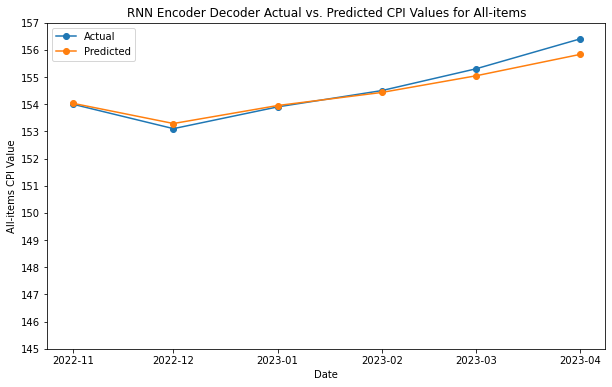

In [11]:


# Plot the actual versus predicted values for "All-items" column
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[1:], test_values, marker ='o', linestyle='-', label='Actual')
plt.plot(test_data.index[1:], predictions,  marker = 'o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('RNN Encoder Decoder Actual vs. Predicted CPI Values for All-items')

# Set custom y-axis ticks without decimal points
plt.yticks(np.arange(145, np.ceil(np.max(test_values))+1, 1))

plt.show()


# BASELINE COMPARED MODELS

### Vector Auto Regression Model (VAR)

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


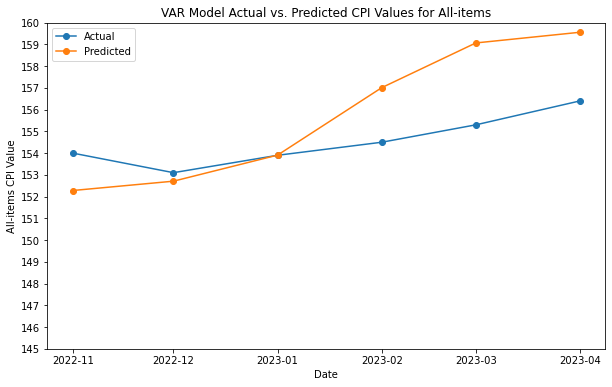

In [12]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
#read data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )
#preprocessing 
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

train_data = data.iloc[:-6]  # Use all but the last 6 months for training (changed traing, test size)
test_data = data.iloc[-6:]  # Use the last 6 months for testing
from statsmodels.tsa.vector_ar.var_model import VAR
#Estimate the VAR model
model = VAR(train_data)
lag_order = model.select_order()
selected_order = lag_order.aic  # Extract the selected lag order value based on AIC
var_model = model.fit(selected_order)
# Check model residuals
residuals = var_model.resid



# Forecasting for 'All-items' component
component = 'All-items'
n_forecast_periods = len(test_data)  # Number of periods to forecast
forecast = var_model.forecast(var_model.y, steps=n_forecast_periods)

# Extract only the 'All-items' column from the forecast array
forecast_all_items = forecast[:, cpi_components.index(component)]

# Create a DataFrame with the forecasted values for 'All-items' component
forecast_df = pd.DataFrame(forecast_all_items, index=test_data.index, columns=[component])

# Calculate evaluation metrics
r2 = r2_score(test_data[component], forecast_df[component])
mae = mean_absolute_error(test_data[component], forecast_df[component])
smape = 100 * np.mean(2 * abs(test_data[component] - forecast_df[component]) / (abs(test_data[component]) + abs(forecast_df[component])))
rmse = np.sqrt(mean_squared_error(test_data[component], forecast_df[component]))
# Plot the actual versus predicted values for 'All-items' component
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_df[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'VAR Model Actual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(145, np.ceil(np.max(forecast_df[component]))+1, 1))
plt.show()


### ARIMA Model

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


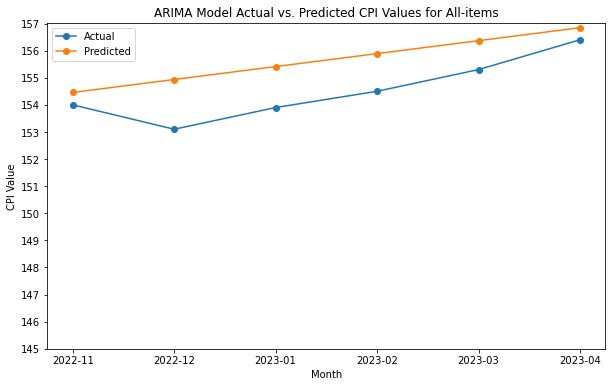

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()

# Extract the features and target variables
features = data.drop(['Date'], axis=1)
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Split the data into features (X) and target (y)
X = features.values
y = target_data.values

# Split the data into training and testing sets
X_train, X_test = X[:238, :], X[238:, :]
y_train, y_test = y[:238, :], y[238:, :]


# ARIMA orders
arima_orders = {
    'All-items': (0, 2, 2),  
    'Food ':(5, 2, 5),
    'Shelter':(0, 2, 1), 
    'Household operations':(0, 1, 0),
    'Clothing and footwear':(4, 1, 4),
    'Transportation':(0, 1, 1), 
    'Gasoline':(1, 1, 2), 
    'Health and personal care':(0, 2, 2), 
    'Recreation & education ':(2, 1, 4),
    'Alcohol, tobacco & cannabis':(0, 1, 0), 
    'All-items excluding food and energy ':(2, 2, 2),
    'All-items excluding energy ':(0, 2, 1), 
    'Energy':(1, 1, 2), 
    'Goods':(0, 1, 1),
    'Services ':(0, 2, 1) 
}

forecast_results = {}
for component in target_columns:
    order = arima_orders[component]

    # Fit the ARIMA model
    arima_model = ARIMA(y_train[:, target_columns.index(component)], order=order)
    arima_model_fit = arima_model.fit()

    residuals = arima_model_fit.resid

    forecast = arima_model_fit.forecast(steps=len(X_test))
    forecast_results[component] = forecast

X_test_df = pd.DataFrame(X_test, columns=features.columns)
forecast_df = pd.DataFrame(forecast_results, index=X_test_df.index)

# Evaluate model performance
arima_mae = mean_absolute_error(y_test, forecast_df.values)
arima_rmse = np.sqrt(mean_squared_error(y_test, forecast_df.values))
arima_r2 = r2_score(y_test, forecast_df.values)

def smape(y_true, y_pred):
    return 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

#Plotting
all_items_index = target_columns.index('All-items')
# Get the date strings for the last 6 months
test_months = 6  
test_dates = data['Date'].str[:7].iloc[-test_months:]

# Plot actual vs. predicted for the 'All-items' column
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, all_items_index], marker='o', linestyle='-', label='Actual')
plt.plot(forecast_df['All-items'], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Month')
plt.ylabel('CPI Value')
plt.title('ARIMA Model Actual vs. Predicted CPI Values for All-items')
plt.legend()
plt.xticks(range(test_months), test_dates)  # Using test_dates as labels
plt.yticks(np.arange(145, np.ceil(np.max(y_test[:, all_items_index])) + 1, 1))
plt.show()



### Lasso Regressor 

C:\Users\Owner\OneDrive\Documents\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.876e+00, tolerance: 2.710e+00
  model = cd_fast.enet_coordinate_descent(


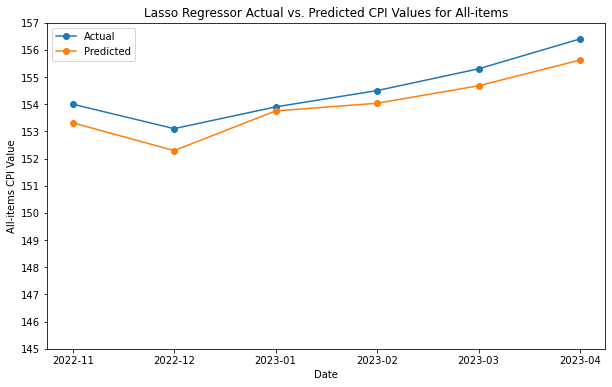

In [14]:
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()  # Drop rows with missing values

# Extract the features and target variables
features = data.drop(['Date'], axis=1)
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Split the data into features (X) and target (y)
X = features.values
y = target_data.values

# Define the number of months for training and testing
train_months = 238
test_months = 6

# Split the data into training and testing sets
X_train, X_test = X[:train_months], X[-test_months:]
y_train, y_test = y[:train_months], y[-test_months:]

# Initialize and train the stacking regressor with Lasso regressor
lasso_regressor = Lasso(alpha=0.7)  
stacked_regressor = MultiOutputRegressor(lasso_regressor)
stacked_regressor.fit(X_train, y_train)
# Make predictions using the stacked regressor
y_pred_stacked = stacked_regressor.predict(X_test)

# Evaluate model performance
lasso_mae = mean_absolute_error(y_test, y_pred_stacked)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
lasso_r2 = r2_score(y_test, y_pred_stacked)

# SMAPE calculation
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(y_test, y_pred_stacked)

# Plotting
component = 'All-items'
# Extract the 'All-items' column indices
all_items_index = target_columns.index('All-items')

# Get the actual and predicted values for 'All-items' column
actual_values = y_test[:, all_items_index]
predicted_values = y_pred_stacked[:, all_items_index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, marker='o', linestyle='-', label='Actual')
plt.plot(predicted_values, marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'Lasso Regressor Actual vs. Predicted CPI Values for {component}')
plt.xticks(range(test_months), data['Date'].str[:7].iloc[-test_months:])
plt.yticks(np.arange(145, np.ceil(np.max(y_test[:, all_items_index]))+1, 1))
plt.show()



### Support Vector Regressor 

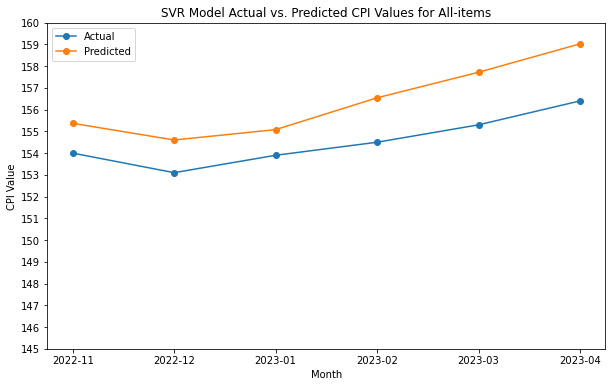

In [16]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load and preprocess the data (same as in your code)
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()

# Extract the features and target variables
features = data.drop(['Date'], axis=1)
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Split the data into features (X) and target (y)
X = features.values
y = target_data.values

# Define the number of months for training and testing
train_months = 238
test_months = 6

# Split the data into training and testing sets
X_train, X_test = X[:train_months], X[-test_months:]
y_train, y_test = y[:train_months], y[-test_months:]

# Initialize SVR models for each target variable
svr_models = [SVR(kernel='poly') for _ in range(y_train.shape[1])]

# Train SVR models for each target variable
for i, svr_model in enumerate(svr_models):
    svr_model.fit(X_train, y_train[:, i])

# Make predictions using the SVR models
y_pred = np.column_stack([svr_model.predict(X_test) for svr_model in svr_models])

# Calculate SMAPE for each target variable
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_scores = [smape(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Calculate overall evaluation metrics
svr_mae = mean_absolute_error(y_test, y_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_r2 = r2_score(y_test, y_pred)
overall_smape = np.mean(smape_scores)


# Plotting for 'All-items' column
all_items_index = target_columns.index('All-items')
actual_values = y_test[:, all_items_index]
predicted_values = y_pred[:, all_items_index]

plt.figure(figsize=(10, 6))
plt.plot(actual_values, marker='o', linestyle='-', label='Actual')
plt.plot(predicted_values, marker='o', linestyle='-', label='Predicted')
plt.xlabel('Month')
plt.ylabel('CPI Value')
plt.title('SVR Model Actual vs. Predicted CPI Values for All-items')
plt.legend()
plt.xticks(range(test_months),  data['Date'].str[:7].iloc[-test_months:])
plt.yticks(np.arange(145, np.ceil(np.max(predicted_values ))+1, 1))
plt.show()

### Random Forest Regressor 

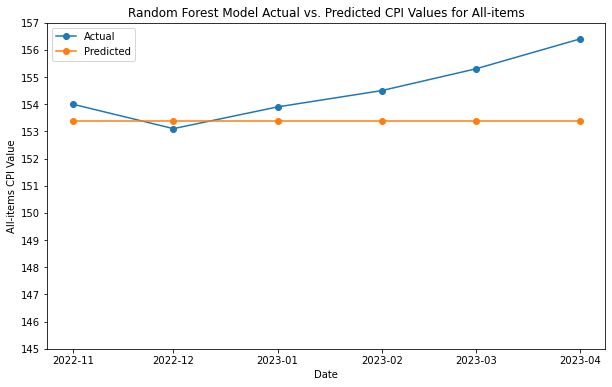

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
train_data = data.iloc[:-6]  # Use all but the last 12 months for training
test_data = data.iloc[-6:]

# Step 3: Fit Random Forest Regressor models for each component
rf_models = {}  # Dictionary to store the Random Forest models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component

smape_scores = []  # List to store SMAPE scores for each component

for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the Random Forest Regressor model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Check model residuals
    train_predictions = rf_model.predict(X_train)
    residuals = y_train - train_predictions
    #plot_acf(residuals)
    #plot_pacf(residuals)
    #plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    #plt.show()

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = rf_model.predict(X_test)

    rf_models[component] = rf_model
    forecast_results[component] = forecast

    # Calculate SMAPE score
    smape = np.mean(2 * np.abs(forecast - test_data[component].values) / (np.abs(forecast) + np.abs(test_data[component].values))) * 100
    smape_scores.append(smape)

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)

# Calculate overall R2 score
rf_r2 = r2_score(test_data.values, forecast_df.values)

# Calculate overall SMAPE score
rf_smape = np.mean(smape_scores)

# Step 5: Evaluate model performance
rf_mae = mean_absolute_error(test_data.values, forecast_df.values)
rf_rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))

component = 'All-items'
# Plot the actual versus predicted values for 'All-items' component
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[component], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index, forecast_df[component], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel(f'{component} CPI Value')
plt.legend()
plt.title(f'Random Forest Model Actual vs. Predicted CPI Values for {component}')
plt.yticks(np.arange(145, np.ceil(np.max(test_data[component].values))+1, 1))
plt.show()


### Artificial Neural Network

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )

# Prepare data for only "All-items" column
all_items_data = data[['All-items']]

# Define the train-test split
train_data = all_items_data[:-6]
test_data = all_items_data[-7:]

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Create X and y for training and testing
X_train, y_train = train_data_scaled[:-1], train_data_scaled[1:]
X_test, y_test = test_data_scaled[:-1], test_data_scaled[1:]

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(180, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4)

# Evaluate the model using the test data
loss = model.evaluate(X_test, y_test)

# Perform predictions
predictions = model.predict(X_test)

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions)


Epoch 1/500
60/60 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 2/500
60/60 [==============================] - 0s 931us/step - loss: 1.6503e-04
Epoch 3/500
60/60 [==============================] - 0s 998us/step - loss: 1.2767e-04
Epoch 4/500
60/60 [==============================] - 0s 885us/step - loss: 1.3851e-04
Epoch 5/500
60/60 [==============================] - 0s 852us/step - loss: 1.1796e-04
Epoch 6/500
60/60 [==============================] - 0s 873us/step - loss: 1.0578e-04
Epoch 7/500
60/60 [==============================] - 0s 828us/step - loss: 1.2119e-04
Epoch 8/500
60/60 [==============================] - 0s 859us/step - loss: 1.3251e-04
Epoch 9/500
60/60 [==============================] - 0s 865us/step - loss: 1.2730e-04
Epoch 10/500
60/60 [==============================] - 0s 1ms/step - loss: 1.1812e-04
Epoch 11/500
60/60 [==============================] - 0s 865us/step - loss: 1.2269e-04
Epoch 12/500
60/60 [==============================] - 0s 921

60/60 [==============================] - 0s 840us/step - loss: 1.8139e-04
Epoch 96/500
60/60 [==============================] - 0s 869us/step - loss: 1.3561e-04
Epoch 97/500
60/60 [==============================] - 0s 883us/step - loss: 1.2119e-04
Epoch 98/500
60/60 [==============================] - 0s 930us/step - loss: 1.3374e-04
Epoch 99/500
60/60 [==============================] - 0s 800us/step - loss: 1.3582e-04
Epoch 100/500
60/60 [==============================] - 0s 811us/step - loss: 1.1118e-04
Epoch 101/500
60/60 [==============================] - 0s 769us/step - loss: 1.1788e-04
Epoch 102/500
60/60 [==============================] - 0s 912us/step - loss: 1.3176e-04
Epoch 103/500
60/60 [==============================] - 0s 918us/step - loss: 1.7728e-04
Epoch 104/500
60/60 [==============================] - 0s 894us/step - loss: 9.8359e-05
Epoch 105/500
60/60 [==============================] - 0s 832us/step - loss: 1.0765e-04
Epoch 106/500
60/60 [=============================

60/60 [==============================] - 0s 893us/step - loss: 1.5557e-04
Epoch 189/500
60/60 [==============================] - 0s 825us/step - loss: 9.5857e-05
Epoch 190/500
60/60 [==============================] - 0s 870us/step - loss: 1.4520e-04
Epoch 191/500
60/60 [==============================] - 0s 782us/step - loss: 2.9762e-04
Epoch 192/500
60/60 [==============================] - 0s 822us/step - loss: 2.7410e-04
Epoch 193/500
60/60 [==============================] - 0s 787us/step - loss: 1.2560e-04
Epoch 194/500
60/60 [==============================] - 0s 819us/step - loss: 1.0818e-04
Epoch 195/500
60/60 [==============================] - 0s 792us/step - loss: 1.0890e-04
Epoch 196/500
60/60 [==============================] - 0s 780us/step - loss: 1.2261e-04
Epoch 197/500
60/60 [==============================] - 0s 783us/step - loss: 1.2982e-04
Epoch 198/500
60/60 [==============================] - 0s 988us/step - loss: 1.2658e-04
Epoch 199/500
60/60 [=========================

60/60 [==============================] - 0s 845us/step - loss: 1.2393e-04
Epoch 282/500
60/60 [==============================] - 0s 837us/step - loss: 1.2662e-04
Epoch 283/500
60/60 [==============================] - 0s 870us/step - loss: 1.2398e-04
Epoch 284/500
60/60 [==============================] - 0s 917us/step - loss: 2.0330e-04
Epoch 285/500
60/60 [==============================] - 0s 806us/step - loss: 1.2504e-04
Epoch 286/500
60/60 [==============================] - 0s 800us/step - loss: 1.4318e-04
Epoch 287/500
60/60 [==============================] - 0s 866us/step - loss: 1.7152e-04
Epoch 288/500
60/60 [==============================] - 0s 827us/step - loss: 1.1792e-04
Epoch 289/500
60/60 [==============================] - 0s 847us/step - loss: 9.9677e-05
Epoch 290/500
60/60 [==============================] - 0s 829us/step - loss: 1.1810e-04
Epoch 291/500
60/60 [==============================] - 0s 820us/step - loss: 1.0073e-04
Epoch 292/500
60/60 [=========================

60/60 [==============================] - 0s 813us/step - loss: 1.4492e-04
Epoch 375/500
60/60 [==============================] - 0s 986us/step - loss: 1.1897e-04
Epoch 376/500
60/60 [==============================] - 0s 872us/step - loss: 1.2392e-04
Epoch 377/500
60/60 [==============================] - 0s 887us/step - loss: 1.4344e-04
Epoch 378/500
60/60 [==============================] - 0s 929us/step - loss: 1.0443e-04
Epoch 379/500
60/60 [==============================] - 0s 879us/step - loss: 1.0515e-04
Epoch 380/500
60/60 [==============================] - 0s 814us/step - loss: 1.2750e-04
Epoch 381/500
60/60 [==============================] - 0s 829us/step - loss: 1.0682e-04
Epoch 382/500
60/60 [==============================] - 0s 846us/step - loss: 1.5192e-04
Epoch 383/500
60/60 [==============================] - 0s 834us/step - loss: 1.0391e-04
Epoch 384/500
60/60 [==============================] - 0s 837us/step - loss: 1.1378e-04
Epoch 385/500
60/60 [=========================

60/60 [==============================] - 0s 890us/step - loss: 1.7754e-04
Epoch 468/500
60/60 [==============================] - 0s 880us/step - loss: 1.1427e-04
Epoch 469/500
60/60 [==============================] - 0s 814us/step - loss: 1.3358e-04
Epoch 470/500
60/60 [==============================] - 0s 809us/step - loss: 1.6932e-04
Epoch 471/500
60/60 [==============================] - 0s 938us/step - loss: 1.3453e-04
Epoch 472/500
60/60 [==============================] - 0s 843us/step - loss: 1.1688e-04
Epoch 473/500
60/60 [==============================] - 0s 780us/step - loss: 1.5122e-04
Epoch 474/500
60/60 [==============================] - 0s 831us/step - loss: 1.0616e-04
Epoch 475/500
60/60 [==============================] - 0s 811us/step - loss: 1.7911e-04
Epoch 476/500
60/60 [==============================] - 0s 936us/step - loss: 1.5028e-04
Epoch 477/500
60/60 [==============================] - 0s 958us/step - loss: 2.2431e-04
Epoch 478/500
60/60 [=========================

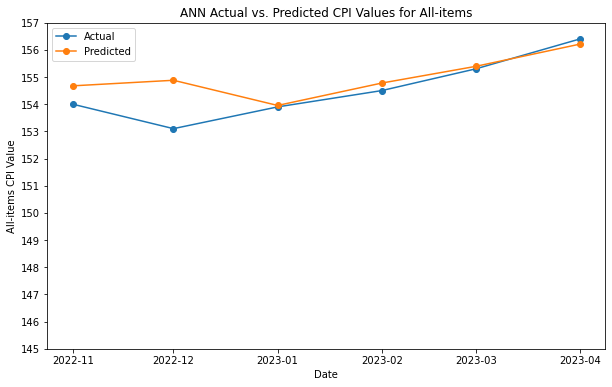

In [21]:
# Plot the actual versus predicted values for "All-items" column
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[1:], test_data['All-items'].values[1:], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index[1:], predictions_denormalized, marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('ANN Actual vs. Predicted CPI Values for All-items')
plt.yticks(np.arange(145, np.ceil(np.max(test_values))+1, 1))

plt.show()


### Convolutional LSTM

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")

# Preprocess the dates
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

# Extract the features and target variables
features = data['Date']
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values.reshape(-1, 1))
scaled_target = scaler.fit_transform(target_data.values)

# Train-Test Split
train_months = 238
test_months = 6

X_train = scaled_features[:train_months]
y_train = scaled_target[:train_months]
X_test = scaled_features[-test_months:]
y_test = scaled_target[-test_months:]

# Reshape data for ConvLSTM
n_samples, n_timesteps, n_features = X_train.shape[0], 1, X_train.shape[1]
X_train = X_train.reshape((n_samples, n_timesteps, 1, n_features, 1))
n_samples_test = X_test.shape[0]
X_test = X_test.reshape((n_samples_test, n_timesteps, 1, n_features, 1))

# Build the Convolutional LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.ConvLSTM2D(filters=120, kernel_size=(1, 3), activation='relu', input_shape=(n_timesteps, 1, n_features, 1), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=len(target_columns), activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4, validation_data=(X_test, y_test))

# Evaluate the Model
predictions = model.predict(X_test)
predictions_denormalized = scaler.inverse_transform(predictions)
target_denormalized = scaler.inverse_transform(y_test)




Epoch 1/500
60/60 [==============================] - 2s 5ms/step - loss: 0.8732 - val_loss: 4.2838
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 0.7959 - val_loss: 3.3929
Epoch 3/500
60/60 [==============================] - 0s 2ms/step - loss: 0.7128 - val_loss: 2.6212
Epoch 4/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6761 - val_loss: 2.2997
Epoch 5/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6647 - val_loss: 2.1884
Epoch 6/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6591 - val_loss: 2.1716
Epoch 7/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6561 - val_loss: 2.1172
Epoch 8/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6544 - val_loss: 2.0677
Epoch 9/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6528 - val_loss: 2.0934
Epoch 10/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6518 - val_loss: 2.0677
Epoch 11/

60/60 [==============================] - 0s 2ms/step - loss: 0.6365 - val_loss: 1.9471
Epoch 84/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6379 - val_loss: 1.9250
Epoch 85/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6363 - val_loss: 1.9421
Epoch 86/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6364 - val_loss: 1.9554
Epoch 87/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6361 - val_loss: 1.9512
Epoch 88/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6363 - val_loss: 1.9367
Epoch 89/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6361 - val_loss: 1.9221
Epoch 90/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6365 - val_loss: 1.9467
Epoch 91/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6356 - val_loss: 1.9295
Epoch 92/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6358 - val_loss: 1.9251
Epoch 93/500


60/60 [==============================] - 0s 3ms/step - loss: 0.6289 - val_loss: 1.9208
Epoch 165/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6282 - val_loss: 1.9159
Epoch 166/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6282 - val_loss: 1.9179
Epoch 167/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6281 - val_loss: 1.9263
Epoch 168/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6284 - val_loss: 1.9314
Epoch 169/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6281 - val_loss: 1.9244
Epoch 170/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6284 - val_loss: 1.9213
Epoch 171/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6285 - val_loss: 1.9205
Epoch 172/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6289 - val_loss: 1.9309
Epoch 173/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6278 - val_loss: 1.9284
Epoc

60/60 [==============================] - 0s 2ms/step - loss: 0.5988 - val_loss: 1.6356
Epoch 246/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5986 - val_loss: 1.6349
Epoch 247/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5984 - val_loss: 1.6441
Epoch 248/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5981 - val_loss: 1.6527
Epoch 249/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5987 - val_loss: 1.6625
Epoch 250/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5983 - val_loss: 1.6767
Epoch 251/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5981 - val_loss: 1.6787
Epoch 252/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5981 - val_loss: 1.6622
Epoch 253/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5981 - val_loss: 1.6680
Epoch 254/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5981 - val_loss: 1.6762
Epoc

60/60 [==============================] - 0s 2ms/step - loss: 0.5974 - val_loss: 1.7239
Epoch 327/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5969 - val_loss: 1.7016
Epoch 328/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5973 - val_loss: 1.7299
Epoch 329/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 1.7372
Epoch 330/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5972 - val_loss: 1.6910
Epoch 331/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5971 - val_loss: 1.8019
Epoch 332/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5983 - val_loss: 1.6749
Epoch 333/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5973 - val_loss: 1.7494
Epoch 334/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 1.7247
Epoch 335/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 1.7206
Epoc

60/60 [==============================] - 0s 3ms/step - loss: 0.5971 - val_loss: 1.7413
Epoch 408/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5969 - val_loss: 1.8241
Epoch 409/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5971 - val_loss: 1.7623
Epoch 410/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5972 - val_loss: 1.7995
Epoch 411/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5967 - val_loss: 1.7235
Epoch 412/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5968 - val_loss: 1.7261
Epoch 413/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5971 - val_loss: 1.7995
Epoch 414/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5972 - val_loss: 1.8251
Epoch 415/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5970 - val_loss: 1.7875
Epoch 416/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5968 - val_loss: 1.7338
Epoc

60/60 [==============================] - 0s 3ms/step - loss: 0.5969 - val_loss: 1.7509
Epoch 489/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5968 - val_loss: 1.8148
Epoch 490/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5969 - val_loss: 1.8478
Epoch 491/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 1.8048
Epoch 492/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5969 - val_loss: 1.7786
Epoch 493/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 1.8442
Epoch 494/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5971 - val_loss: 1.7380
Epoch 495/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5966 - val_loss: 1.8052
Epoch 496/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5971 - val_loss: 1.8037
Epoch 497/500
60/60 [==============================] - 0s 3ms/step - loss: 0.5971 - val_loss: 1.7856
Epoc

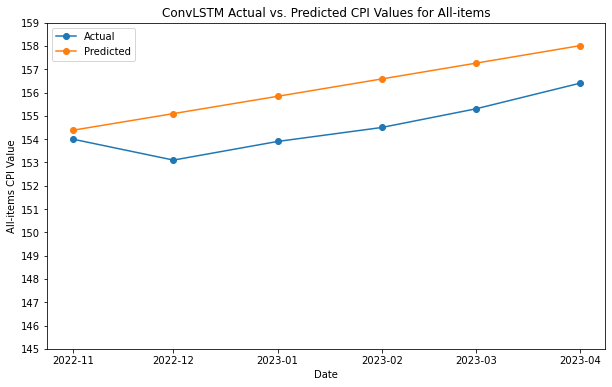

In [24]:
# Plot the actual versus predicted values for "All-items" column
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[1:], target_denormalized[:, 0], marker='o', linestyle='-', label='Actual')
plt.plot(test_data.index[1:], predictions_denormalized[:, 0], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('All-items CPI Value')
plt.legend()
plt.title('ConvLSTM Actual vs. Predicted CPI Values for All-items')
plt.yticks(np.arange(145, np.ceil(np.max(predictions_denormalized[:, 0]))+1, 1))

plt.show()